DEEP LEARNING(AI5100) ASSIGNMENT-01


BM23MTECH11006


PITHANI TEJA VENKATA RAMANA KUMAR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

**1. Perceptron learning algorithm [10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3].Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points. Plot the dataset before and
after training (with the classifier).
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability (γ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of γ, and do this for about 5 values of γ. Observe if you can
relate to the result discussed in class)**

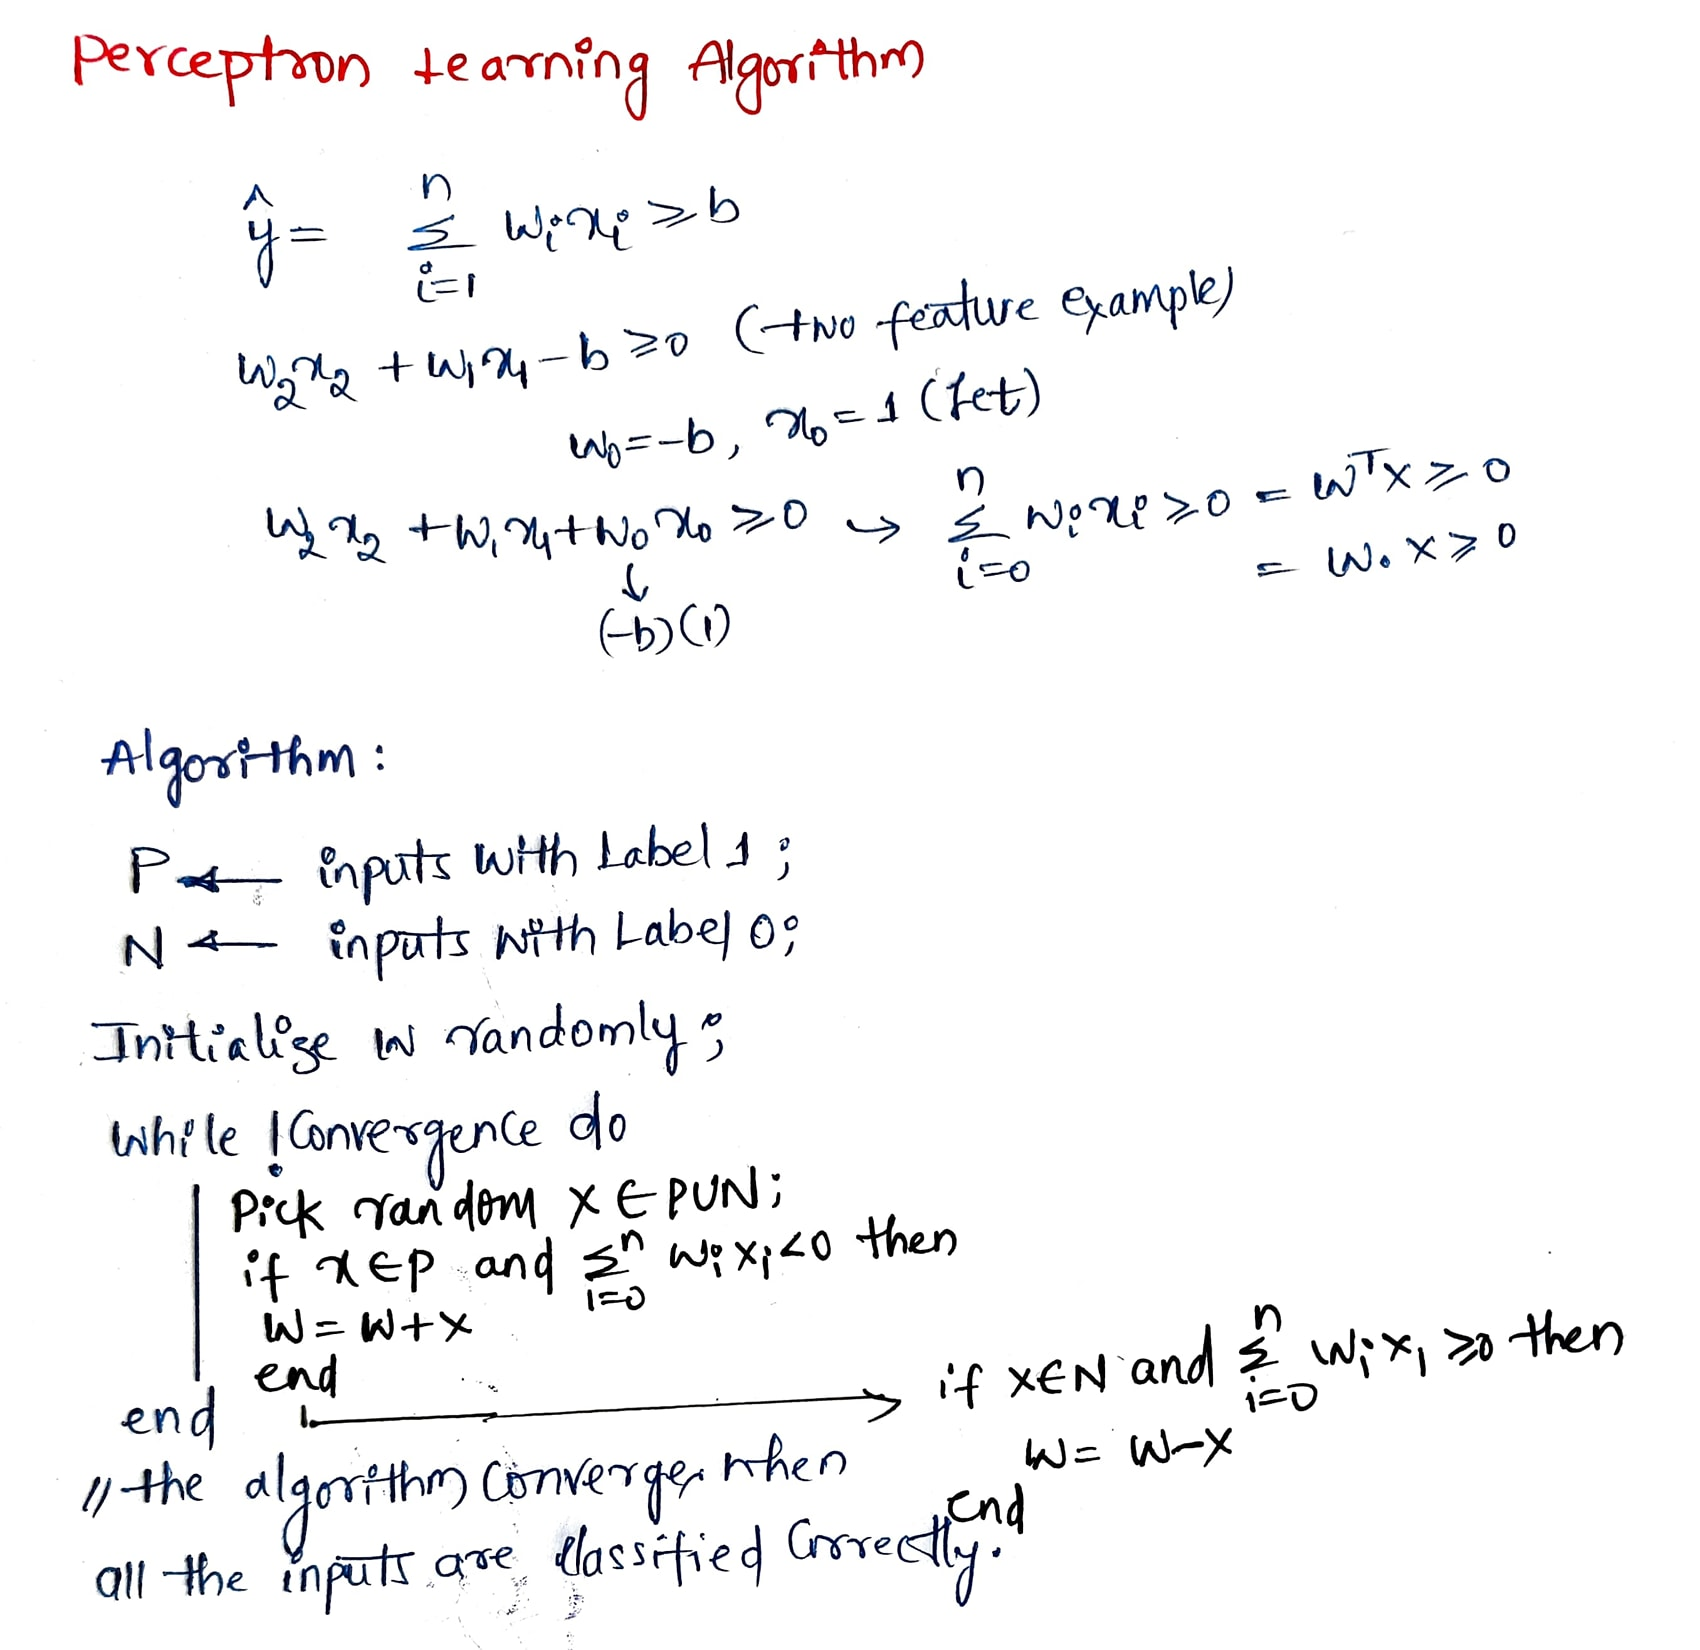

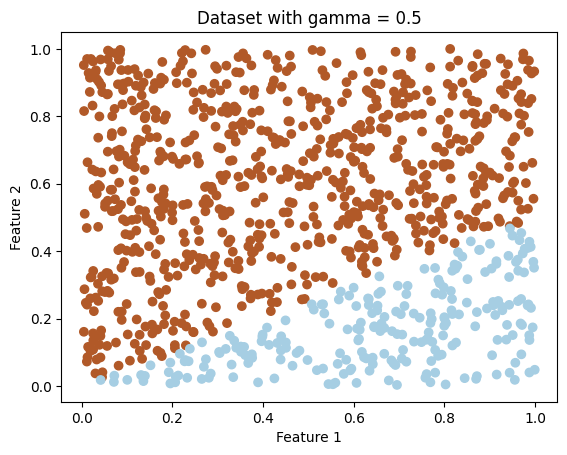

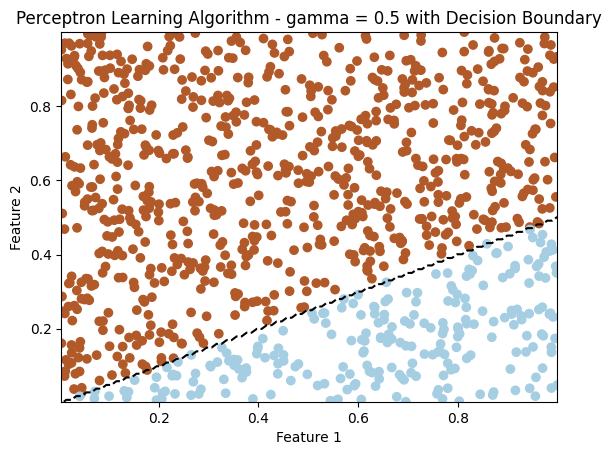

iterations for gamma=0.5: 10


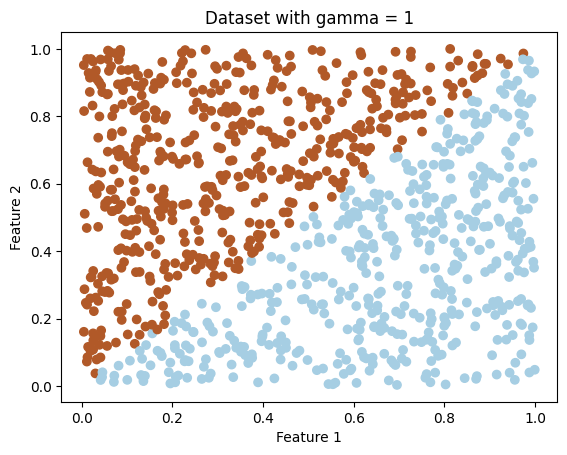

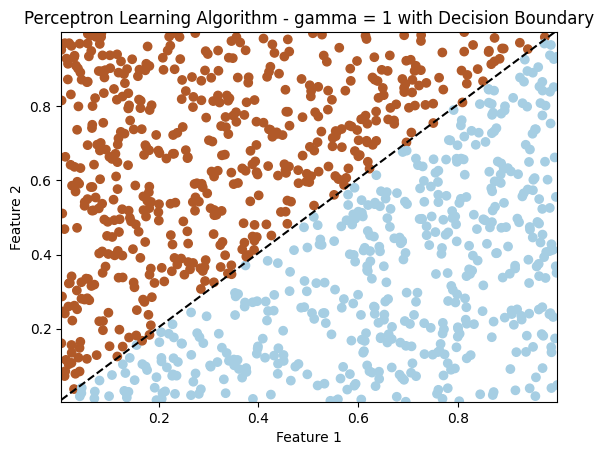

iterations for gamma=1: 33


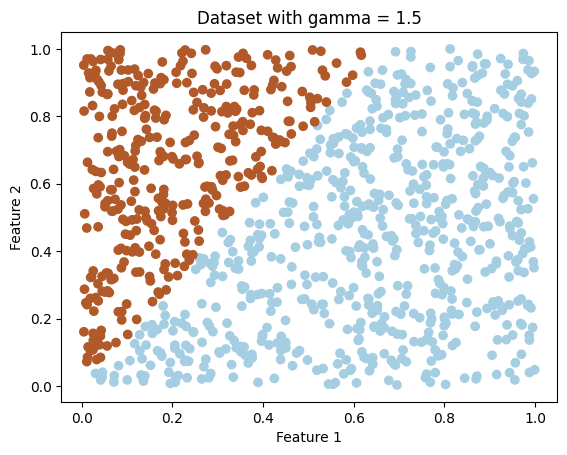

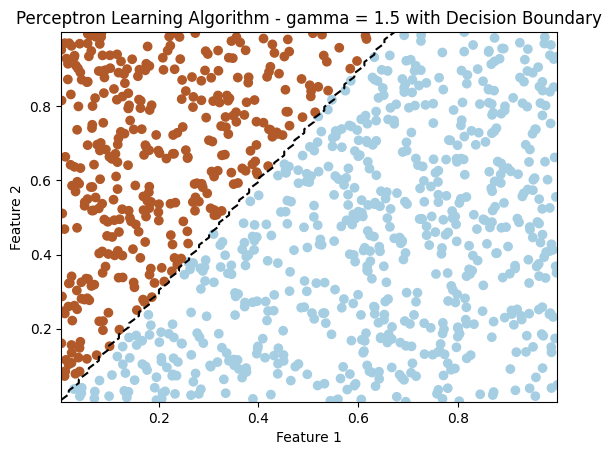

iterations for gamma=1.5: 3


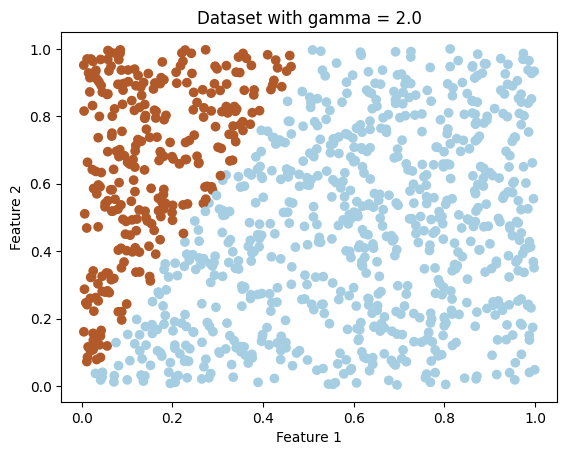

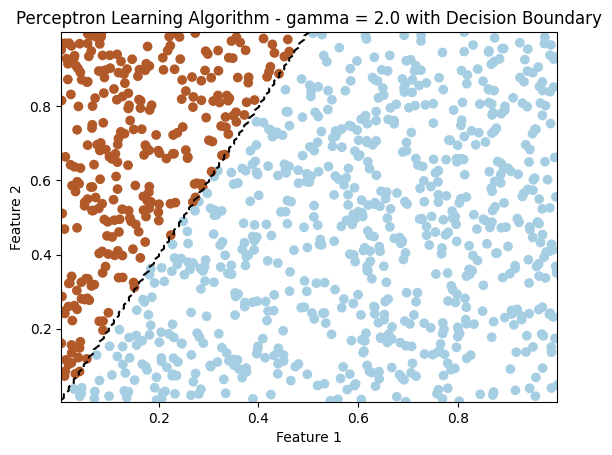

iterations for gamma=2.0: 6


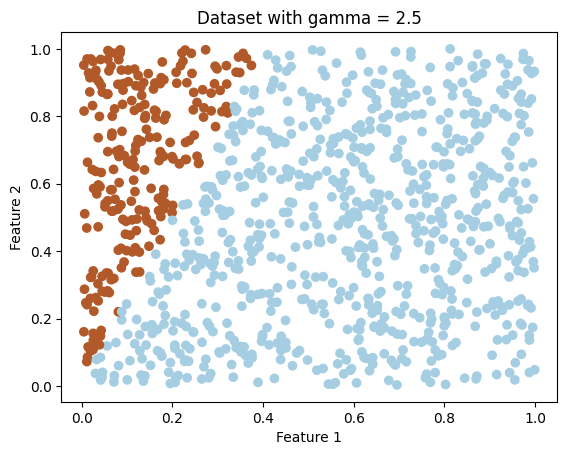

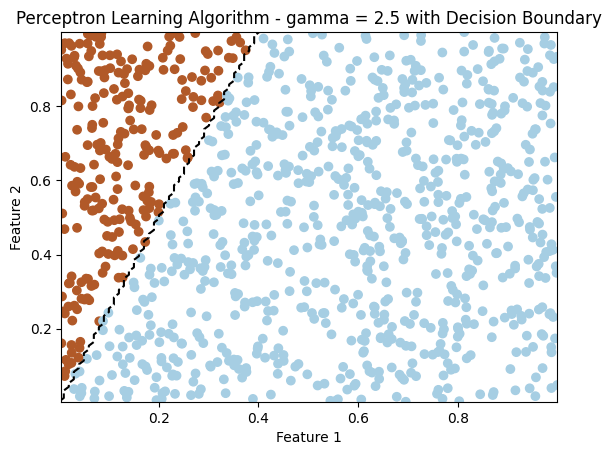

iterations for gamma=2.5: 10


In [ ]:
# Function to create a linearly separable dataset
def create_dataset(num_points, gamma):
    np.random.seed(42)
    X = np.random.rand(num_points, 2)   # Random points in the range [0, 1]
    y = np.where(X[:, 1] - gamma * X[:, 0] >= 0, 1, 0)  # 1 if the condition is True, 0 otherwise
    return X, y

# Function to plot the dataset
def plot_dataset(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Perceptron learning algorithm
def perceptron_algorithm(X, y, max_iterations=1000):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features+1)  # Extra dimension for bias

    X = np.column_stack([np.ones(num_samples), X])  # Add bias term

    for iteration in range(max_iterations):
        misclassified = 0
        for i in range(num_samples):
              prediction = np.dot(X[i], weights)
              if prediction >=0:
                  y_pred = 1
              else:
                  y_pred = 0
              error = y[i] - y_pred
              weights += error * X[i]

              if error!=0:
                  misclassified += 1
        if misclassified == 0:
            break
    return weights,iteration+1

# Function to classify points using the trained perceptron
def classify_points(X, weights):
    X = np.column_stack([np.ones(X.shape[0]), X])  # Add bias term
    return np.sign(np.dot(X, weights))

# Function to plot the decision boundary
def plot_decision_boundary(X, y, weights, title):
    #plot_dataset(X, y, title)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')


    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

    Z = classify_points(np.c_[xx.ravel(), yy.ravel()], weights)
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='dashed')
    plt.title(title + " with Decision Boundary")
    plt.show()


# Main code
gammas = [0.5, 1,1.5,2.0,2.5]
average_iterations = []

for gamma in gammas:
    X, y = create_dataset(1000, gamma)
    plot_dataset(X, y, f"Dataset with gamma = {gamma}")

    weights,iterations = perceptron_algorithm(X, y)
    plot_decision_boundary(X, y, weights, f"Perceptron Learning Algorithm - gamma = {gamma}")

    average_iterations.append(iterations)  # The number of iterations is stored in the bias term of weights

    print(f"iterations for gamma={gamma}: {iterations}")






# **Observations**

In [ ]:
# Finding the value of R.
R_distance = math.dist([0, 0], [10, 10])


In [ ]:
# Calculating the value of R_square_by_gamma_square
R_square_by_gamma_square = [(R_distance * R_distance / (g * g)) for g in gammas]

# Printing the results
print("Value of 1/(gamma)^2 for 5 datasets:", R_square_by_gamma_square)
print("Number of updates our perceptron is making for 5 datasets:", average_iterations)


Value of 1/(gamma)^2 for 5 datasets: [800.0000000000001, 200.00000000000003, 88.8888888888889, 50.00000000000001, 32.00000000000001]
Number of updates our perceptron is making for 5 datasets: [10, 33, 3, 6, 10]


As we can observe that for each dataset the number of update our perceptron makes is $k < R^2/\gamma^2 $
i.e
* 10< 800
* 33< 200
* 3< 88.88
* 6< 50
* 10< 32


**2. Gradient descent for training a linear classifier [10 = loss formulation 4 + gradient computation 3 + update equation 3].Consider solving the above problem (training a line for classifying a linearly separable 2D dataset) using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our classroom discussion on the desirable properties of a loss function. You may implement the analytical way of finding gradient for it. You may implement the basic version of gradient descent update equation. Plot the dataset before and after training (with the classifier).**

 $\underline{Logistic Loss} $  As loss function for my Solution.
* $l(\phi(x),y)=\max\left(0,1-y\phi(x)\right)$.

differentiation of Logistic Loss which I have used in Gredient Decent

$l'(f(x),y) = \begin{cases}
    0 & y\phi(x)\geq 0 \\
    -y\phi_i(x) & otherwise
    \end{cases}
$


Gradient Descent for updating values(Geometrical solution for updating weights to reach optimum weights with small learning rate.

$\theta_{n+1} \leftarrow \theta_n - \eta \frac{\delta L}{\delta \theta}$.

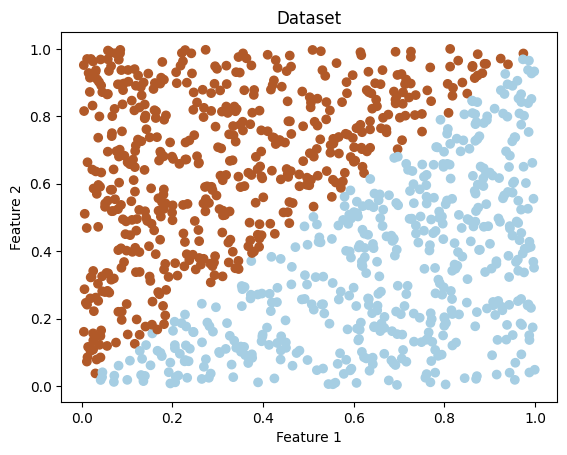

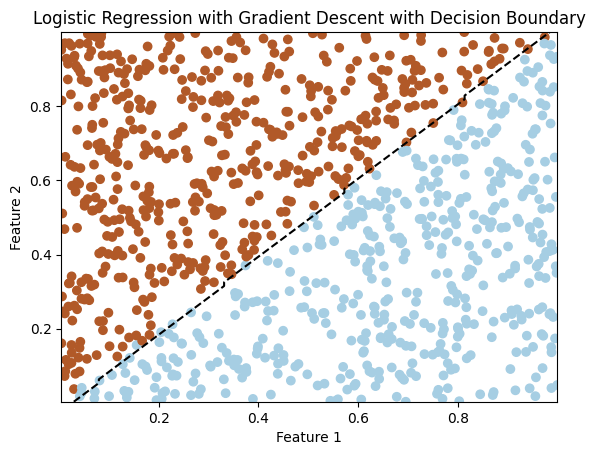

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create a linearly separable dataset
def create_dataset(num_points, gamma):
    np.random.seed(42)
    X = np.random.rand(num_points, 2)   # Random points in the range [0, 1]
    y = np.where(X[:, 1] - gamma * X[:, 0] >= 0, 1, 0)  # 1 if the condition is True, 0 otherwise
    return X, y

# Function to plot the dataset
def plot_dataset(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic loss function
def logistic_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient computation for logistic loss
def compute_gradient(X, y, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    gradient = np.dot(X.T, (predictions - y)) / len(y)
    return gradient

# Gradient Descent update equation
def gradient_descent(X, y, learning_rate=0.3, max_iterations=800):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features+1)  # Extra dimension for bias
    X = np.column_stack([np.ones(num_samples), X])  # Add bias term

    for iteration in range(max_iterations):
        gradient = compute_gradient(X, y, weights)
        weights -= learning_rate * gradient

    return weights

# Function to classify points using the trained logistic regression
def classify_points(X, weights):
    X = np.column_stack([np.ones(X.shape[0]), X])  # Add bias term
    predictions = sigmoid(np.dot(X, weights))
    return np.round(predictions)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, weights, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

    Z = classify_points(np.c_[xx.ravel(), yy.ravel()], weights)
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], colors='k', linestyles='dashed')
    plt.title(title + " with Decision Boundary")
    plt.show()

# Main code
gamma = 1
X, y = create_dataset(1000, gamma)
plot_dataset(X, y, "Dataset")

# Train the linear classifier using Gradient Descent
weights = gradient_descent(X, y)

# Plot the decision boundary after training
plot_decision_boundary(X, y, weights, "Logistic Regression with Gradient Descent")


**3. MLP with a single hidden layer[20 = dataset creation 5 + MLP definition 5 + backprop 10].This question has two variations, and you are expected to attempt any one of the variations. The second variation, if implemented properly, will fetch you a 5% bonus on this assignment.Original Question: Consider a binary classification dataset that is not linearly separable in 2D (e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP) with a single hidden layer for classifying the same. You may use the loss function used in problem2. You have to implement the backpropagation algorithm yourself.Variation: Implement your own toy autograd engine, and use it to solve the original question. You are welcome to discuss the approach with TAs if you like.**

MLP:- Its multiple layers of perceptrons which are fully connected, so that non linear boundaries can be generated with linear perceptrons.

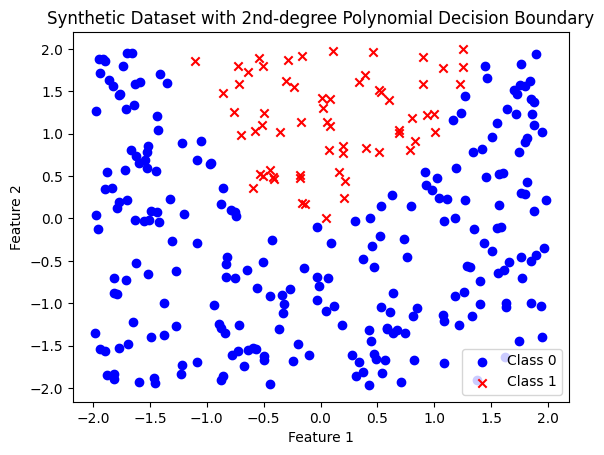

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Function to create a 2nd-degree polynomial dataset
def generate_polynomial_data(num_samples):
    # Generate random values for features
    X = np.random.rand(num_samples, 2) * 4 - 2  # Random values in the range [-2, 2]

    # Create labels based on a 2nd-degree polynomial decision boundary
    y = (X[:, 1] > X[:, 0]**2).astype(int)

    return X, y

# Generate the dataset
num_samples = 300
X, y = generate_polynomial_data(num_samples)

# Plot the dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', marker='x', label='Class 1')

plt.title('Synthetic Dataset with 2nd-degree Polynomial Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    return weights_input_hidden, weights_hidden_output

def forward_propagation(X, weights_input_hidden, weights_hidden_output):
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    return hidden_layer_output, output_layer_output

def backward_propagation(X, y, hidden_layer_output, output_layer_output, weights_hidden_output):
    output_error = y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    return hidden_layer_delta, output_delta

def update_weights(X, hidden_layer_output, hidden_layer_delta, output_delta, weights_input_hidden, weights_hidden_output, learning_rate):
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate

    return weights_input_hidden, weights_hidden_output

def train_mlp(X, y, hidden_size, output_size, learning_rate, epochs):
    input_size = X.shape[1]
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        hidden_layer_output, output_layer_output = forward_propagation(X, weights_input_hidden, weights_hidden_output)
        hidden_layer_delta, output_delta = backward_propagation(X, y, hidden_layer_output, output_layer_output, weights_hidden_output)
        weights_input_hidden, weights_hidden_output = update_weights(X, hidden_layer_output, hidden_layer_delta, output_delta, weights_input_hidden, weights_hidden_output, learning_rate)

    return weights_input_hidden, weights_hidden_output


# Example usage
hidden_size = 6
output_size = 1
learning_rate = 0.01
epochs = 40000

weights_input_hidden, weights_hidden_output = train_mlp(X, y.reshape(-1, 1), hidden_size, output_size, learning_rate, epochs)


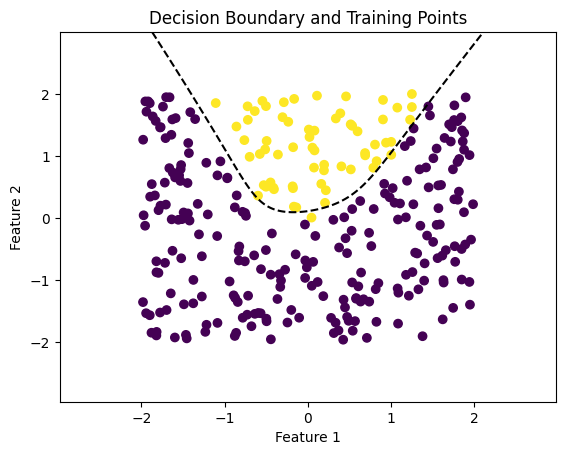

In [ ]:
# Function to plot the decision boundary as a line
def plot_decision_boundary(X, y, weights_input_hidden, weights_hidden_output):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Flatten the meshgrid and perform forward propagation
    meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
    _, Z = forward_propagation(meshgrid_points, weights_input_hidden, weights_hidden_output)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary as a line
    plt.contour(xx, yy, Z, levels=[0.5], colors='k', linestyles='dashed')

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Decision Boundary and Training Points")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary as a line
plot_decision_boundary(X, y, weights_input_hidden, weights_hidden_output)
